# Nama Project : Memprediksi yang Terkena Diabetes (Diabetes dan Tidak Diabetes) Berdasarkan Dataset "diabetes.csv" menggunakan Algoritma k-Nearest Neighbors (KNN)

## Nama : Rifai Nugroho
## NIM : 10121295
## Kelas : IF8
## Jurusan : Teknik Informatika S1
## Asal Kampus : Universitas Komputer Indonesia (Kota Bandung)

## Library yang Dipakai

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from google.colab import files

## Silakan Upload File di Sini

In [76]:
uploaded=files.upload()

Saving diabetes.csv to diabetes (2).csv


## Menampilkan Dataset

In [77]:
#Input Dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
dataset.empty

False

In [78]:
x = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values

In [79]:
print(x)

[[148  72]
 [ 85  66]
 [183  64]
 ...
 [121  72]
 [126  60]
 [ 93  70]]


In [80]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

## Membagi Dataset ke Data Training dan Data Testing

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Variabel x

In [82]:
print(x_train)

[[ 89  62]
 [118  58]
 [ 91  80]
 ...
 [ 94  65]
 [ 85  74]
 [136  82]]


In [83]:
len(x_train)

576

In [84]:
len(x)

768

In [85]:
len(x_test)

192

## Variabel y

In [86]:
print(y_train)

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 

In [87]:
len(y_train)

576

In [88]:
len(y)

768

In [89]:
len(y_test)

192

## Scaling Data

In [90]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
print(x_train)

[[-1.01521454 -0.40451932]
 [-0.09964691 -0.61509602]
 [-0.95207195  0.54307587]
 ...
 [-0.85735805 -0.24658679]
 [-1.14149973  0.2272108 ]
 [ 0.46863645  0.64836422]]


In [92]:
print(x_test)

[[ 2.4576282   0.33249916]
 [-0.44693118  0.2272108 ]
 [-1.42564141 -0.40451932]
 [ 1.41577538  0.12192245]
 [-0.32064599 -0.24658679]
 [-1.26778492  0.12192245]
 [ 0.97377721  0.43778751]
 [ 1.73148836  0.85894093]
 [ 0.18449477 -0.61509602]
 [-0.57321637  0.12192245]
 [ 1.163205    0.33249916]
 [ 2.07877263  0.33249916]
 [-0.2259321   0.2272108 ]
 [-1.23621362 -0.93096108]
 [-1.77292569  0.12192245]
 [-0.41535989 -0.08865426]
 [ 1.82620225  0.12192245]
 [-1.5203553  -1.03624944]
 [ 0.34235126  0.85894093]
 [-0.69950156 -0.82567273]
 [ 0.72120683  0.64836422]
 [-0.09964691  0.54307587]
 [-1.07835714 -3.66845828]
 [-1.89921088  0.64836422]
 [-0.76264416 -0.19394261]
 [ 0.08978088 -0.50980767]
 [-0.54164508  0.33249916]
 [ 1.00534851  0.96422928]
 [-0.28907469 -0.19394261]
 [-0.35221729 -0.08865426]
 [ 0.46863645  0.2272108 ]
 [-0.60478767 -0.29923096]
 [-0.60478767  0.85894093]
 [ 0.02663828 -0.93096108]
 [-0.06807561 -0.82567273]
 [ 1.47891798 -0.29923096]
 [ 0.46863645  0.75365257]
 

## Memanggil Function KNN

In [93]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Menentukan Prediksi

In [94]:
y_pred = classifier.predict(x_test)

## Evaluasi dan Validasi

In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111  19]
 [ 29  33]]


## Menampilkan Tingkat Akurasi

In [96]:
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.63      0.53      0.58        62

    accuracy                           0.75       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



In [99]:
ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y_pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,1


In [97]:
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 75 persen


## Visualisasi Data (Grafik)

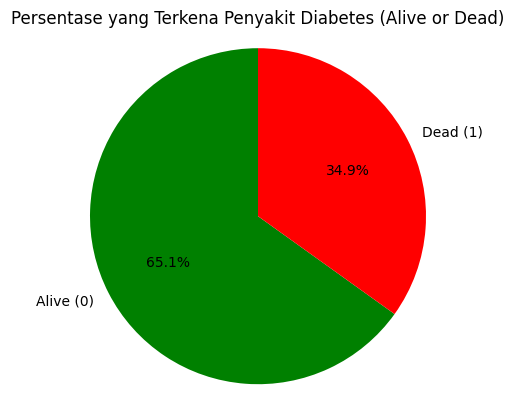

In [100]:
outcome_counts = dataset['Outcome'].value_counts()
labels = ['Alive (0)', 'Dead (1)']
colors = ['green', 'red']

plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')
plt.title('Persentase yang Terkena Penyakit Diabetes (Alive or Dead)')
plt.show()